# Objetivos e observações

Se existe um produto que toma os noticiarios quando há alteração de preços são os combustíveis. E se você, como um revendedor conseguisse ter uma estimativa do valor que essa mercadoria poderá possuir daqui a X tempo? Conseguiria planejar seus estoques com mais acertividade? Talvez reservar uma parte do caixa para uma compra futura maior a um preço mais baixo? As possibilidades são várias.

Nosso objetivo será analisar a evolução histórico do produto Gasolina Comum ao longo de alguns anos para tentarmos entender como conseguirimos chegar nesse objetivo.

Os dados originais podem ser encontrados no site do Gov.br pelo link:
https://dados.gov.br/dados/conjuntos-dados/serie-historica-de-precos-de-combustiveis-e-de-glp

# Bibliotecas, Importações e Transformações Iniciais

**Importando bibliotecas**

In [ ]:
! pip install sklearn
! pip install scipy

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
palette = sb.color_palette("mako", as_cmap=True)
sb.set_theme(style="ticks")
import os
import datetime as dt
import time
import scipy

**Importando dados**

In [2]:
def read_data():
    path = 'D:/Python/combustiveis/dados_historicos/'
    files_name = os.listdir(path)
    df = pd.DataFrame()
    
    for file in files_name:
        df_temp = pd.read_csv(path + file, sep=';', parse_dates=True, encoding='latin-1')
        df = pd.concat([df, df_temp])
    
    df = df.drop(columns=['ï»¿Regiao - Sigla', 'Regiao - Sigla', 'Nome da Rua','Numero Rua','Complemento','Cep','Unidade de Medida'])
    nomes_colunas = {
                    'Estado - Sigla':'EstadoSigla',
                    'Municipio':'Municipio',
                    'Revenda':'Revenda',
                    'CNPJ da Revenda':'CNPJRevenda',
                    'Bairro':'Bairro',
                    'Produto':'Produto',
                    'Data da Coleta':'DataColeta',
                    'Valor de Venda':'ValorVenda',
                    'Valor de Compra':'ValorCompra',
                    'Bandeira':'Bandeira'
                     }

    df = df.rename(columns=nomes_colunas)
    return df

In [3]:
df = read_data()
df

C:\Users\Usuário\AppData\Local\Temp\ipykernel_7380\1004902520.py:7: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(path + file, sep=';', parse_dates=True, encoding='latin-1')


,EstadoSigla,Municipio,Revenda,CNPJRevenda,Bairro,Produto,DataColeta,ValorVenda,ValorCompra,Bandeira
0,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,34.274.233/0015-08,STIEP,GNV,02/01/2018,"2,37","1,7383",PETROBRAS DISTRIBUIDORA S.A.
1,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,34.274.233/0015-08,STIEP,DIESEL S10,02/01/2018,"3,24","3,1366",PETROBRAS DISTRIBUIDORA S.A.
2,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,34.274.233/0015-08,STIEP,ETANOL,02/01/2018,"2,93","2,6194",PETROBRAS DISTRIBUIDORA S.A.
3,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,34.274.233/0015-08,STIEP,GASOLINA,02/01/2018,"3,62","3,6017",PETROBRAS DISTRIBUIDORA S.A.
4,RS,CANOAS,METROPOLITANO COMERCIO DE COMBUSTIVEIS LTDA,88.587.589/0001-17,CENTRO,GNV,02/01/2018,"2,699",NaN,BRANCA
...,...,...,...,...,...,...,...,...,...,...
472851,BA,JEQUIE,COMERCIAL DE COMBUSTIVEL CACHOEIRINHA LTDA,28.629.089/0001-79,TROPICAL,ETANOL,31/12/2021,"5,859",NaN,PETROSERRA
472852,MG,ITUIUTABA,ABC DISTRIBUICAO DE PETROLEO LTDA,13.117.591/0006-38,ALVORADA,GASOLINA,31/12/2021,"6,58",NaN,BRANCA
472853,MG,ITUIUTABA,ABC DISTRIBUICAO DE PETROLEO LTDA,13.117.591/0006-38,ALVORADA,ETANOL,31/12/2021,"4,74",NaN,BRANCA
472854,MG,ITUIUTABA,ABC DISTRIBUICAO DE PETROLEO LTDA,13.117.591/0006-38,ALVORADA,DIESEL S10,31/12/2021,"5,448",NaN,BRANCA


In [4]:
#Filtrando somente o produto Gasolina
df = df.loc[df['Produto']=='GASOLINA']

**Criando Backup**

**df = DataFrame (Original) | dfb = DataFrameBackup (Usado para análise)**

In [5]:
dfb = df.copy()

In [6]:
dfb.shape

(1018260, 10)

In [7]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1018260 entries, 3 to 472852
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   EstadoSigla  1018260 non-null  object
 1   Municipio    1018260 non-null  object
 2   Revenda      1018260 non-null  object
 3   CNPJRevenda  1018260 non-null  object
 4   Bairro       1015026 non-null  object
 5   Produto      1018260 non-null  object
 6   DataColeta   1018260 non-null  object
 7   ValorVenda   1018260 non-null  object
 8   ValorCompra  302782 non-null   object
 9   Bandeira     1018260 non-null  object
dtypes: object(10)
memory usage: 85.5+ MB


In [8]:
dfb.isnull().sum()

EstadoSigla         0
Municipio           0
Revenda             0
CNPJRevenda         0
Bairro           3234
Produto             0
DataColeta          0
ValorVenda          0
ValorCompra    715478
Bandeira            0
dtype: int64

**Adicionando Colunas Auxiliares e Fazendo Conversões**

In [36]:
#Convertendo Valor de Venda e Valor de Compra em float
dfb['ValorVenda'] = dfb['ValorVenda'].str.replace(',','.').astype(float)
dfb['ValorCompra'] = dfb['ValorCompra'].str.replace(',','.').astype(float)

AttributeError: Can only use .str accessor with string values!

In [10]:
#Colunas de Data.
dfb['DataColeta'] = pd.to_datetime(dfb['DataColeta'],format='mixed')
dfb['mes'] = dfb['DataColeta'].dt.month.astype(int)
dfb['ano'] = dfb['DataColeta'].dt.year.astype(int)
dfb['dia'] = dfb['DataColeta'].dt.day.astype(int)
dfb['mes-ano'] = dfb['DataColeta'].dt.strftime('%Y-%m')

#Coluna de Lucro Bruto.
dfb['lucrobruto'] = dfb['ValorVenda'] - dfb['ValorCompra']

#Coluna de Mrg.
dfb['mrg'] = (dfb['ValorVenda']-dfb['ValorCompra'])/dfb['ValorVenda']

# Análise Exploratória - Variáveis Quantitativas

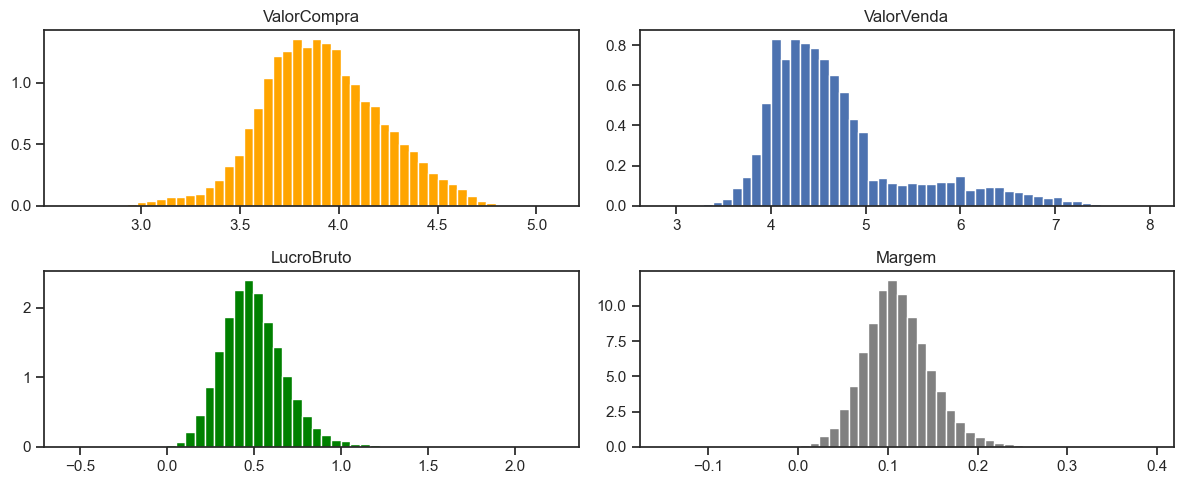

In [11]:
#Anaslisando Valores númericos
plt.figure(figsize=(12,5))
plt.subplot(2,2,1)
plt.title('ValorCompra')
plt.hist(x=dfb['ValorCompra'],color='orange',density=True,bins=50)
plt.subplot(2,2,2)
plt.title('ValorVenda')
plt.hist(x=dfb['ValorVenda'],density=True,bins=50)
plt.subplot(2,2,3)
plt.title('LucroBruto')
plt.hist(x=dfb['lucrobruto'],color='green',density=True,bins=50)
plt.subplot(2,2,4)
plt.title('Margem')
plt.hist(x=dfb['mrg'],color='gray',density=True,bins=50)
plt.tight_layout()
plt.show()

Usualmente vemos que no mercado de postos de gasolina a "briga" entre os revendedores é literalmente disputada em centavos de diferença, em relação ao preço de venda. Analisando a distribuição das variáveis **ValorCompra, LucroBruto e Margem** podemos visualizar o motivo. Distribuições muito homogêneas, semelhantes a uma distribuição Gaussiana (Normal).

Outro ponto, na preparação inicial dos dados, verificamos que 715.478 registros de compra estão vazios na base. Isso possivelmente está impactando na distribuição do valor de compra.

Podemos tentar estimar esses valores com base nos valores de margem (em percentual %) observados. Porém, não faremos por hora.

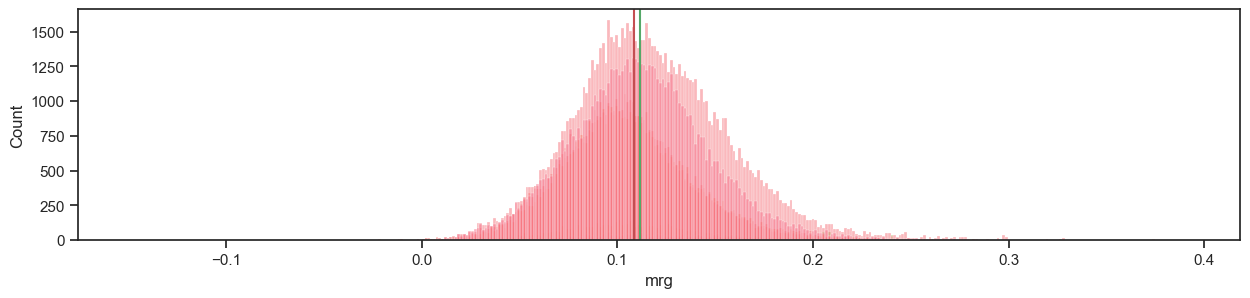

count    302782.000000
mean          0.111416
std           0.037767
min          -0.148819
25%           0.086712
50%           0.108710
75%           0.133538
max           0.391459
Name: mrg, dtype: float64


In [12]:
#Analisando distribuição das margens
plt.figure(figsize=(15,3))
data = dfb[['mrg','Bandeira']].dropna()
sb.histplot(data=data, x="mrg", hue="Bandeira", legend=False)
plt.axvline(x=dfb['mrg'].median(),color='r')
plt.axvline(x=dfb['mrg'].mean(),color='g')
plt.show()
print(dfb['mrg'].describe())

Analisando a distribuição das margens de lucros, **mesmo separando por bandeira**, observamos que realmente é uma distribuição bem homogênea, com isso temos mais segurança para inferir o preço de compra dos registros que apareceram com valores de compra zerados. Mas não o faremos por hora, somente na fase preparação dos dados para o modelo

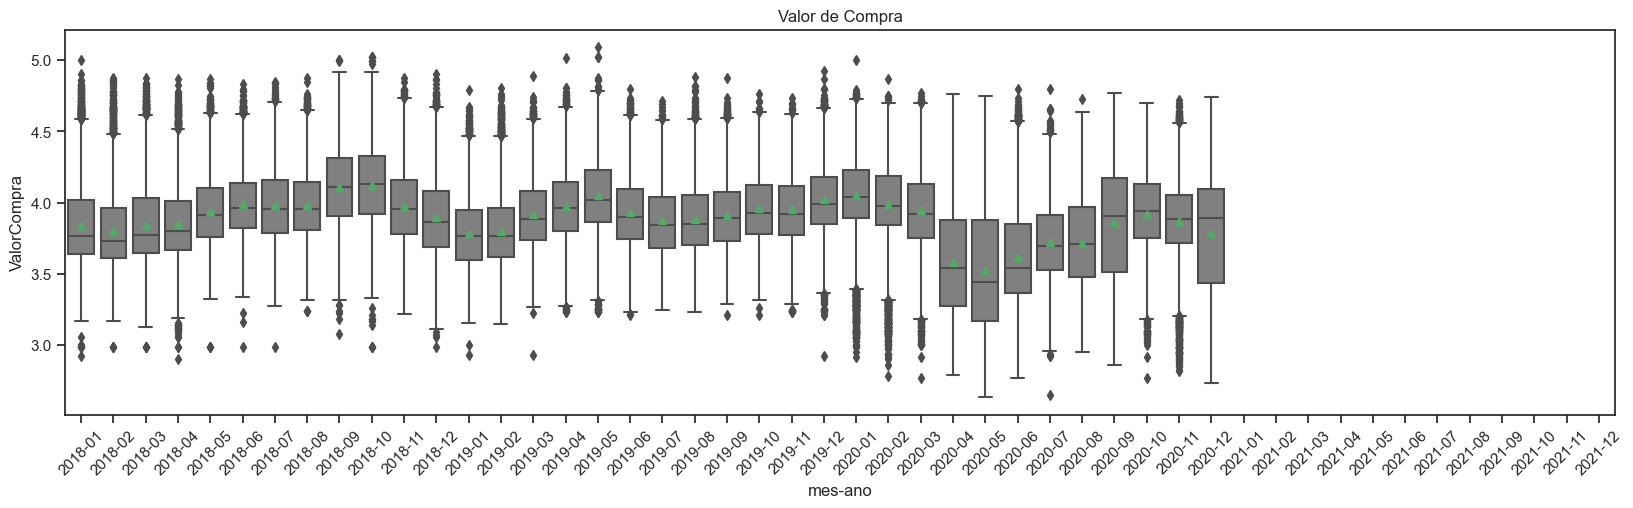

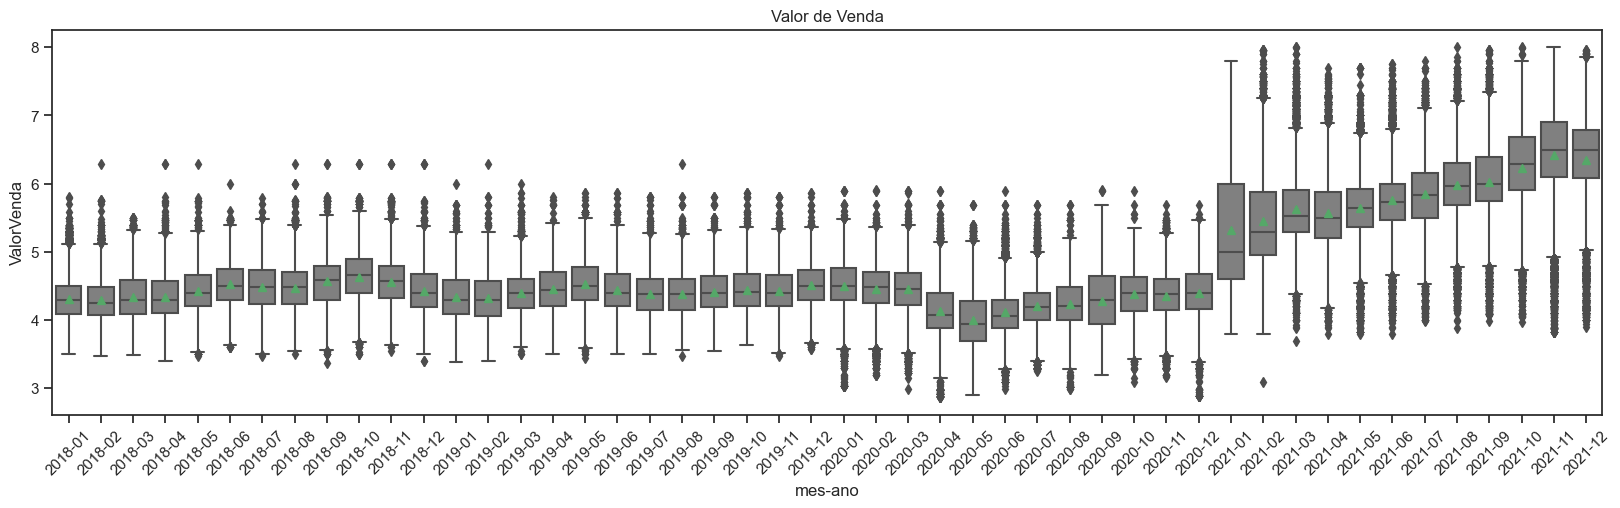

In [13]:
data = dfb[['DataColeta','mes','mes-ano','ValorCompra']]
plt.figure(figsize=(20,5))
plt.title('Valor de Compra')
boxplot = sb.boxplot(data=dfb.sort_values('DataColeta'), x='mes-ano',y='ValorCompra',showmeans=True, color='gray')
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)
plt.show()

data = dfb[['DataColeta','mes','mes-ano','ValorVenda']]
plt.figure(figsize=(20,5))
plt.title('Valor de Venda')
boxplot = sb.boxplot(data=dfb.sort_values('DataColeta'), x='mes-ano',y='ValorVenda',showmeans=True, color='gray')
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)
plt.show()

Aumento expresivo na variação do preço de venda em 2021, reflexo da pandemia

In [14]:
missing = df.loc[df['ValorCompra'].isnull()]
missing['DataColeta'] = pd.to_datetime(missing['DataColeta'],format='mixed')
missing['ano'] = missing['DataColeta'].dt.year.astype(int)

t = missing['ano'].value_counts()
size = len(missing['DataColeta'])
t = pd.DataFrame(t)
t['%'] = round((t['count']/size)*100,2)

print(t)
print(t['count'].sum())

       count      %
ano                
2021  204426  28.57
2019  179697  25.12
2018  167218  23.37
2020  164137  22.94
715478


C:\Users\Usuário\AppData\Local\Temp\ipykernel_7380\2097870740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing['DataColeta'] = pd.to_datetime(missing['DataColeta'],format='mixed')
C:\Users\Usuário\AppData\Local\Temp\ipykernel_7380\2097870740.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing['ano'] = missing['DataColeta'].dt.year.astype(int)


Como esperado a partir de 2020 com a chegada da pandemia os preços começaram a ter uma variação muito grande nos valores de compras, o que obviamente reflete no valor de venda dos produtos. **Saimos de variações de em média 3,00 para incríveis 6,00 de amplitude entre os preços dentro de um mesmo mês.** 

Porém, como observado a margem de lucro se manteve bastante homogênea.

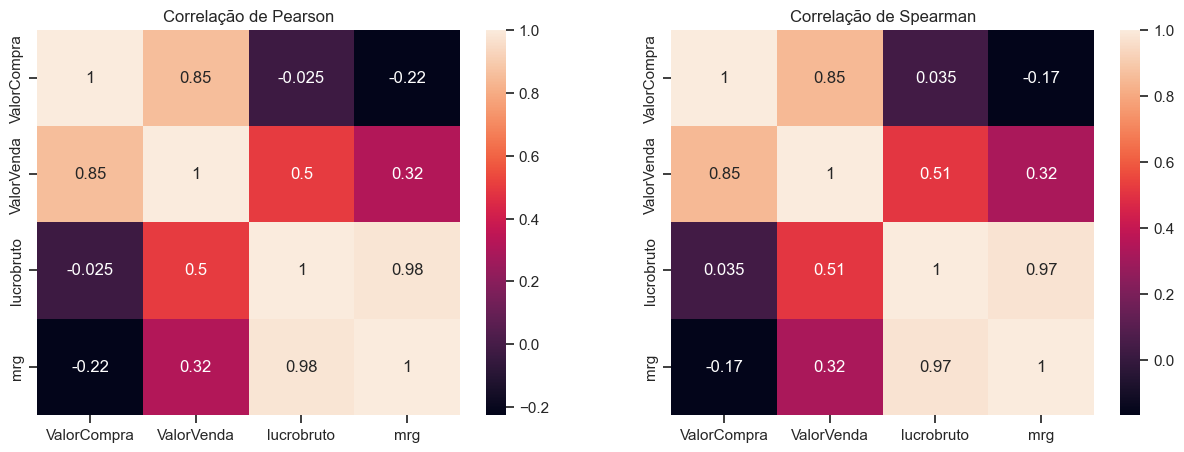

In [15]:
#Analisando Correlação
var_numericas = ['ValorCompra','ValorVenda','lucrobruto','mrg']

plt.figure(figsize=(15,5))
plt.subplot(1,2,1,title='Correlação de Pearson')
sb.heatmap(data=dfb[var_numericas].corr(method='pearson'),annot=True)

plt.subplot(1,2,2,title='Correlação de Spearman')
sb.heatmap(data=dfb[var_numericas].corr(method='spearman'),annot=True)
plt.show()

Analisando a correlação entre as variáveis temos que:

**ValorCompra** - Fortemente correlacionado com ValorVenda.

**ValorVenda** - Fortemente correlacionado com ValorCompra e  Fortemente com LucroBruto.

**LucroBruto** - Moderamente correlacionado com ValorVenda e Fortemente com Mrg.

**Mrg (Margem)** - Fortemente influenciada pelo LucroBruto

# Análise Exploratória - Variáveis Qualitativas

***
Vamos analisar como o Valor de Compra se comporta em relação a:
- Bandeira
- Estado

***
**BANDEIRA**

In [61]:
top5 = dfb[['Bandeira']].value_counts()
top5 = top5.head(5)
print(top5)
total_count = len(dfb['Bandeira'])
print(f'{round(top5.sum()/total_count,2)*100}% de {total_count}')

Bandeira                    
BRANCA                          354662
PETROBRAS DISTRIBUIDORA S.A.    198731
IPIRANGA                        176278
RAIZEN                          157975
VIBRA ENERGIA                    37684
Name: count, dtype: int64
91.0% de 1018260


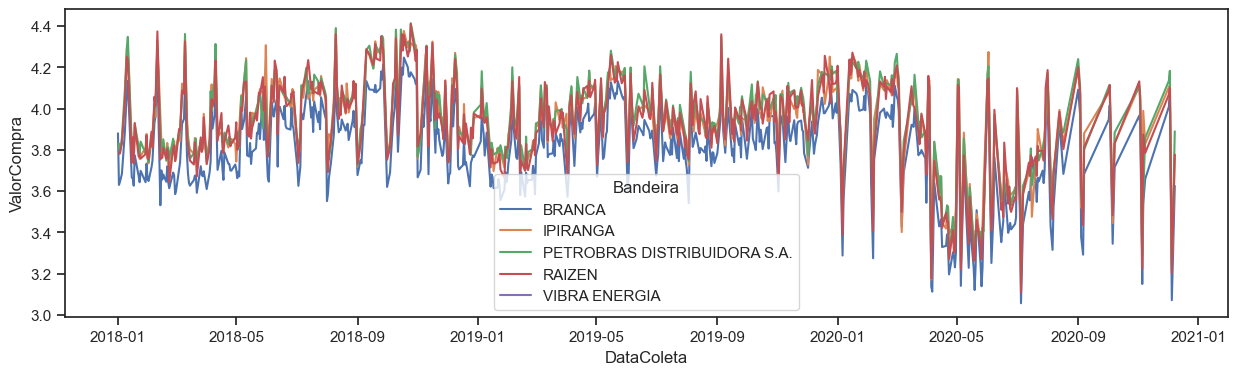

In [17]:
#Criando listas com top5 bandeiras que mais apareceram na base
bandeiras = list(top5.index)
bandeiras_tratadas = []
for i in bandeiras:
    bandeiras_tratadas.append(i[0])
    
data = dfb.loc[dfb['Bandeira'].isin(bandeiras_tratadas)]
data = data.groupby(['DataColeta','Bandeira'])['ValorCompra'].mean()
data = data.reset_index()
plt.figure(figsize=(15,4))
sb.lineplot(data, x='DataColeta',y='ValorCompra',hue='Bandeira')
plt.show()

Mesmo entre as bandeiras, as diferenças absolutas são pequenas, reforçando a ideia da "briga por centavos".

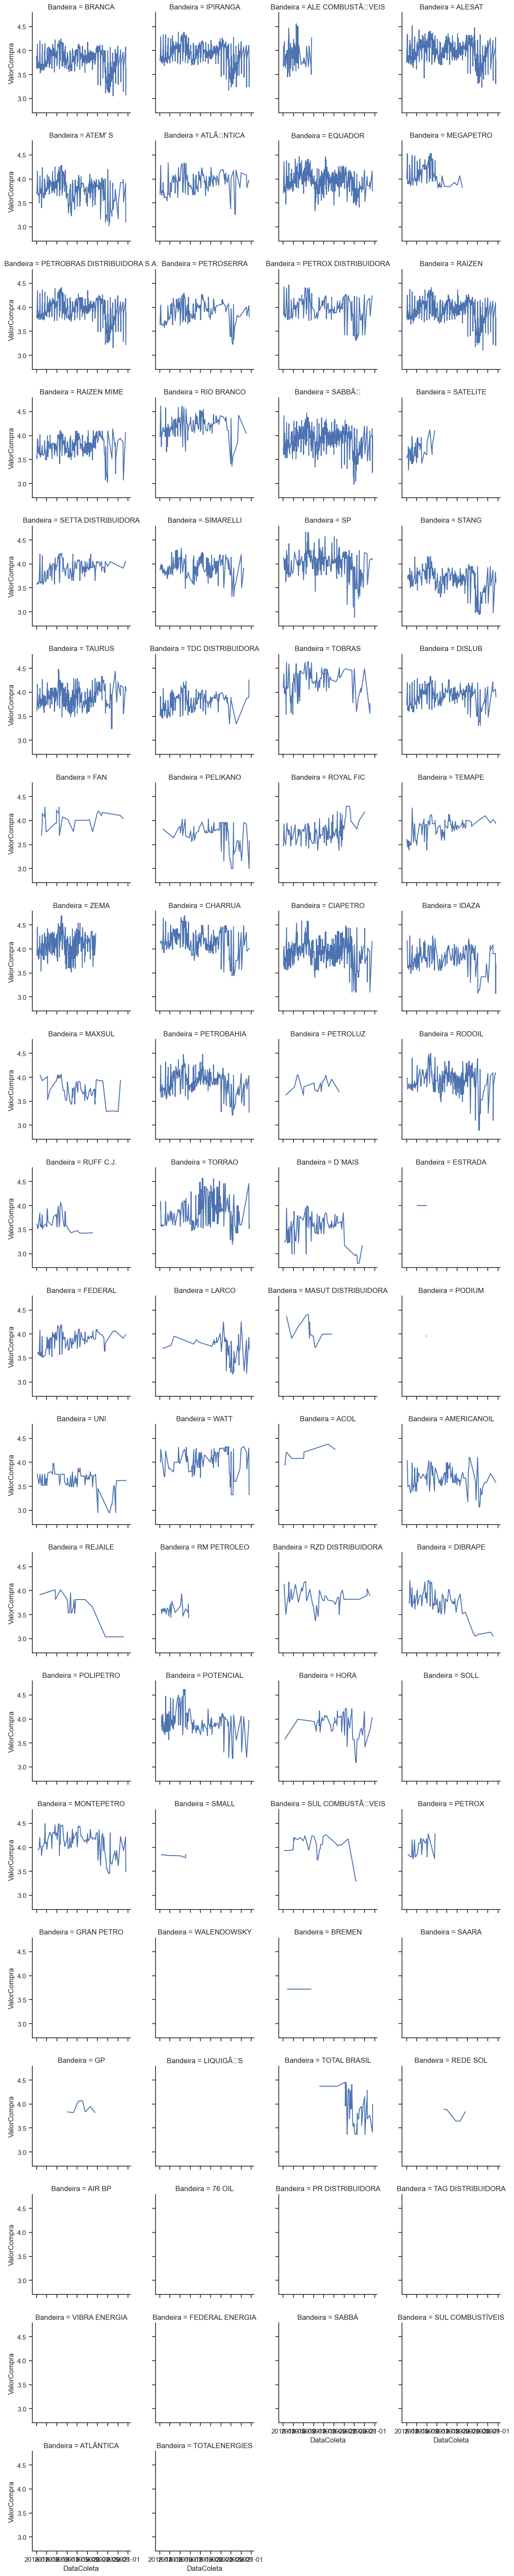

In [18]:
import warnings
warnings.filterwarnings("ignore")
data = dfb.groupby(['DataColeta','Bandeira'])['ValorCompra'].mean()
data = data.reset_index()

grid = sb.FacetGrid(data,col='Bandeira',col_wrap=4,dropna=True)
grid.map(sb.lineplot, 'DataColeta', 'ValorCompra')
plt.show()

***
**ESTADO**

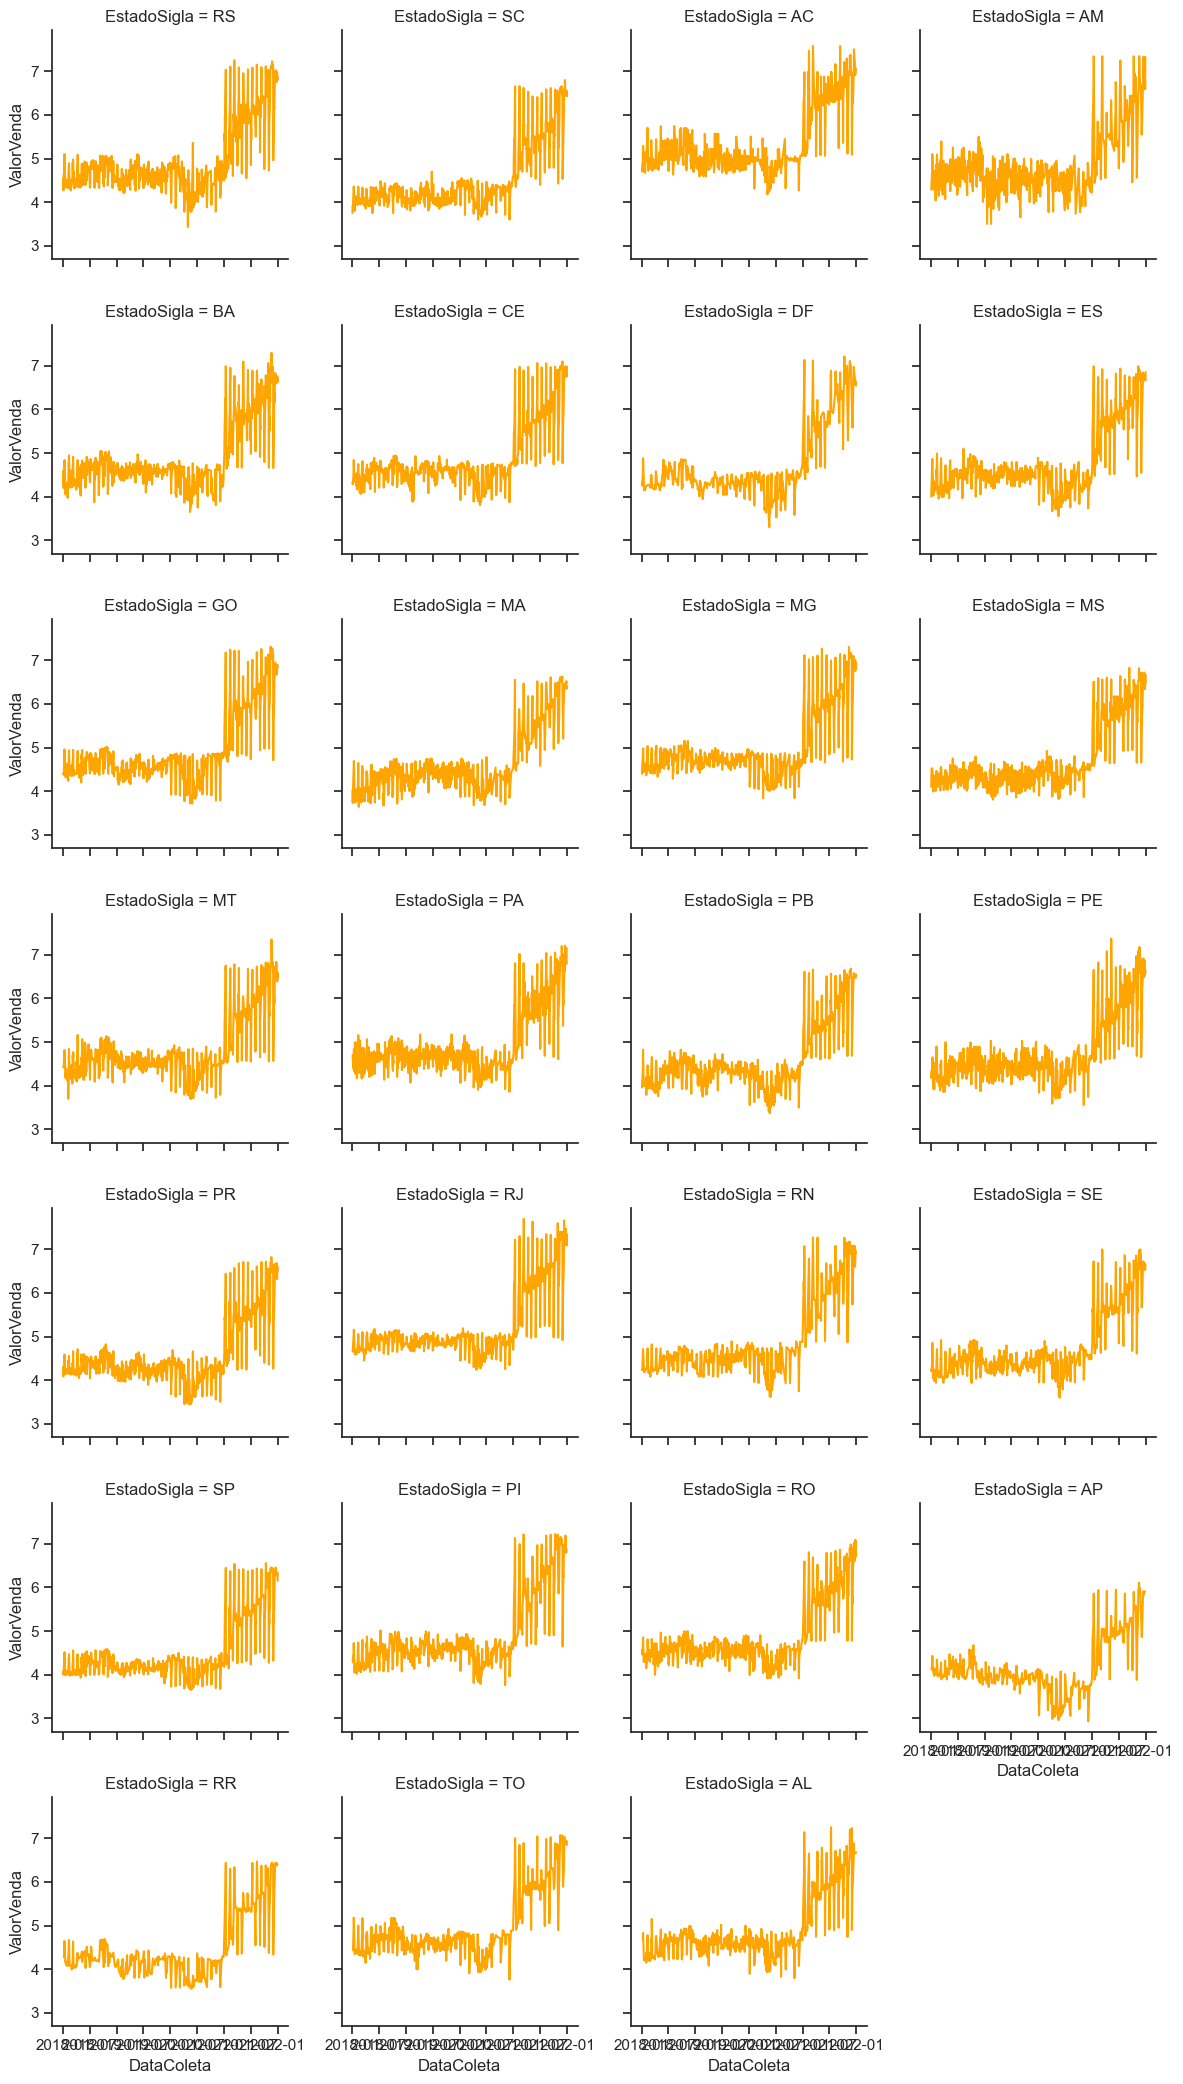

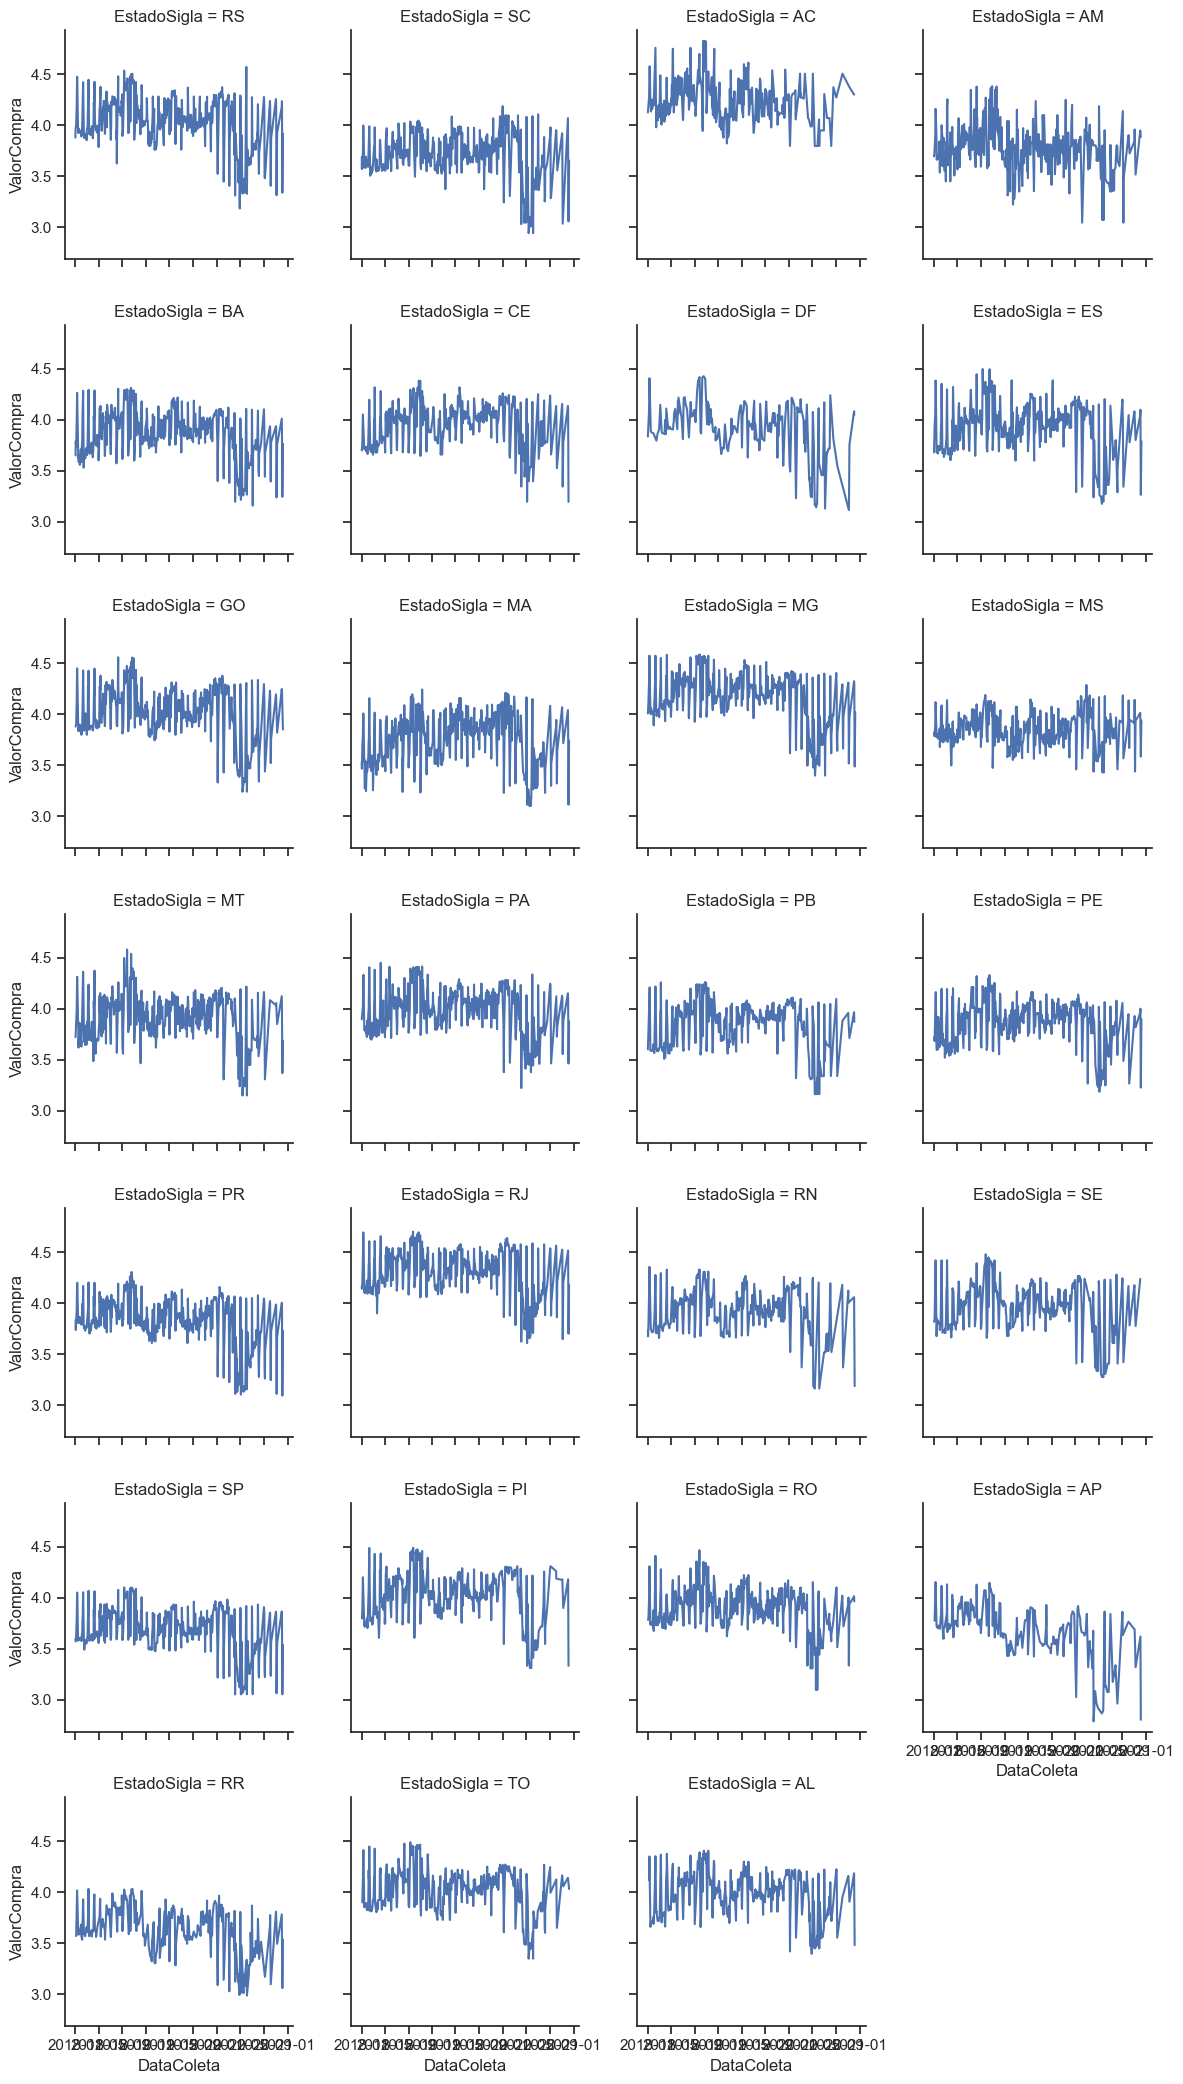

In [19]:
#Evolução ao longo do tempo (2019-2021)
data = dfb.groupby(['DataColeta','EstadoSigla'])[['ValorVenda','ValorCompra']].mean()
data = data.reset_index()

grid = sb.FacetGrid(data,col='EstadoSigla',col_wrap=4)
grid.map(sb.lineplot, 'DataColeta', 'ValorVenda',color='orange')
plt.show()

grid = sb.FacetGrid(data,col='EstadoSigla',col_wrap=4)
grid.map(sb.lineplot, 'DataColeta', 'ValorCompra')
plt.show()

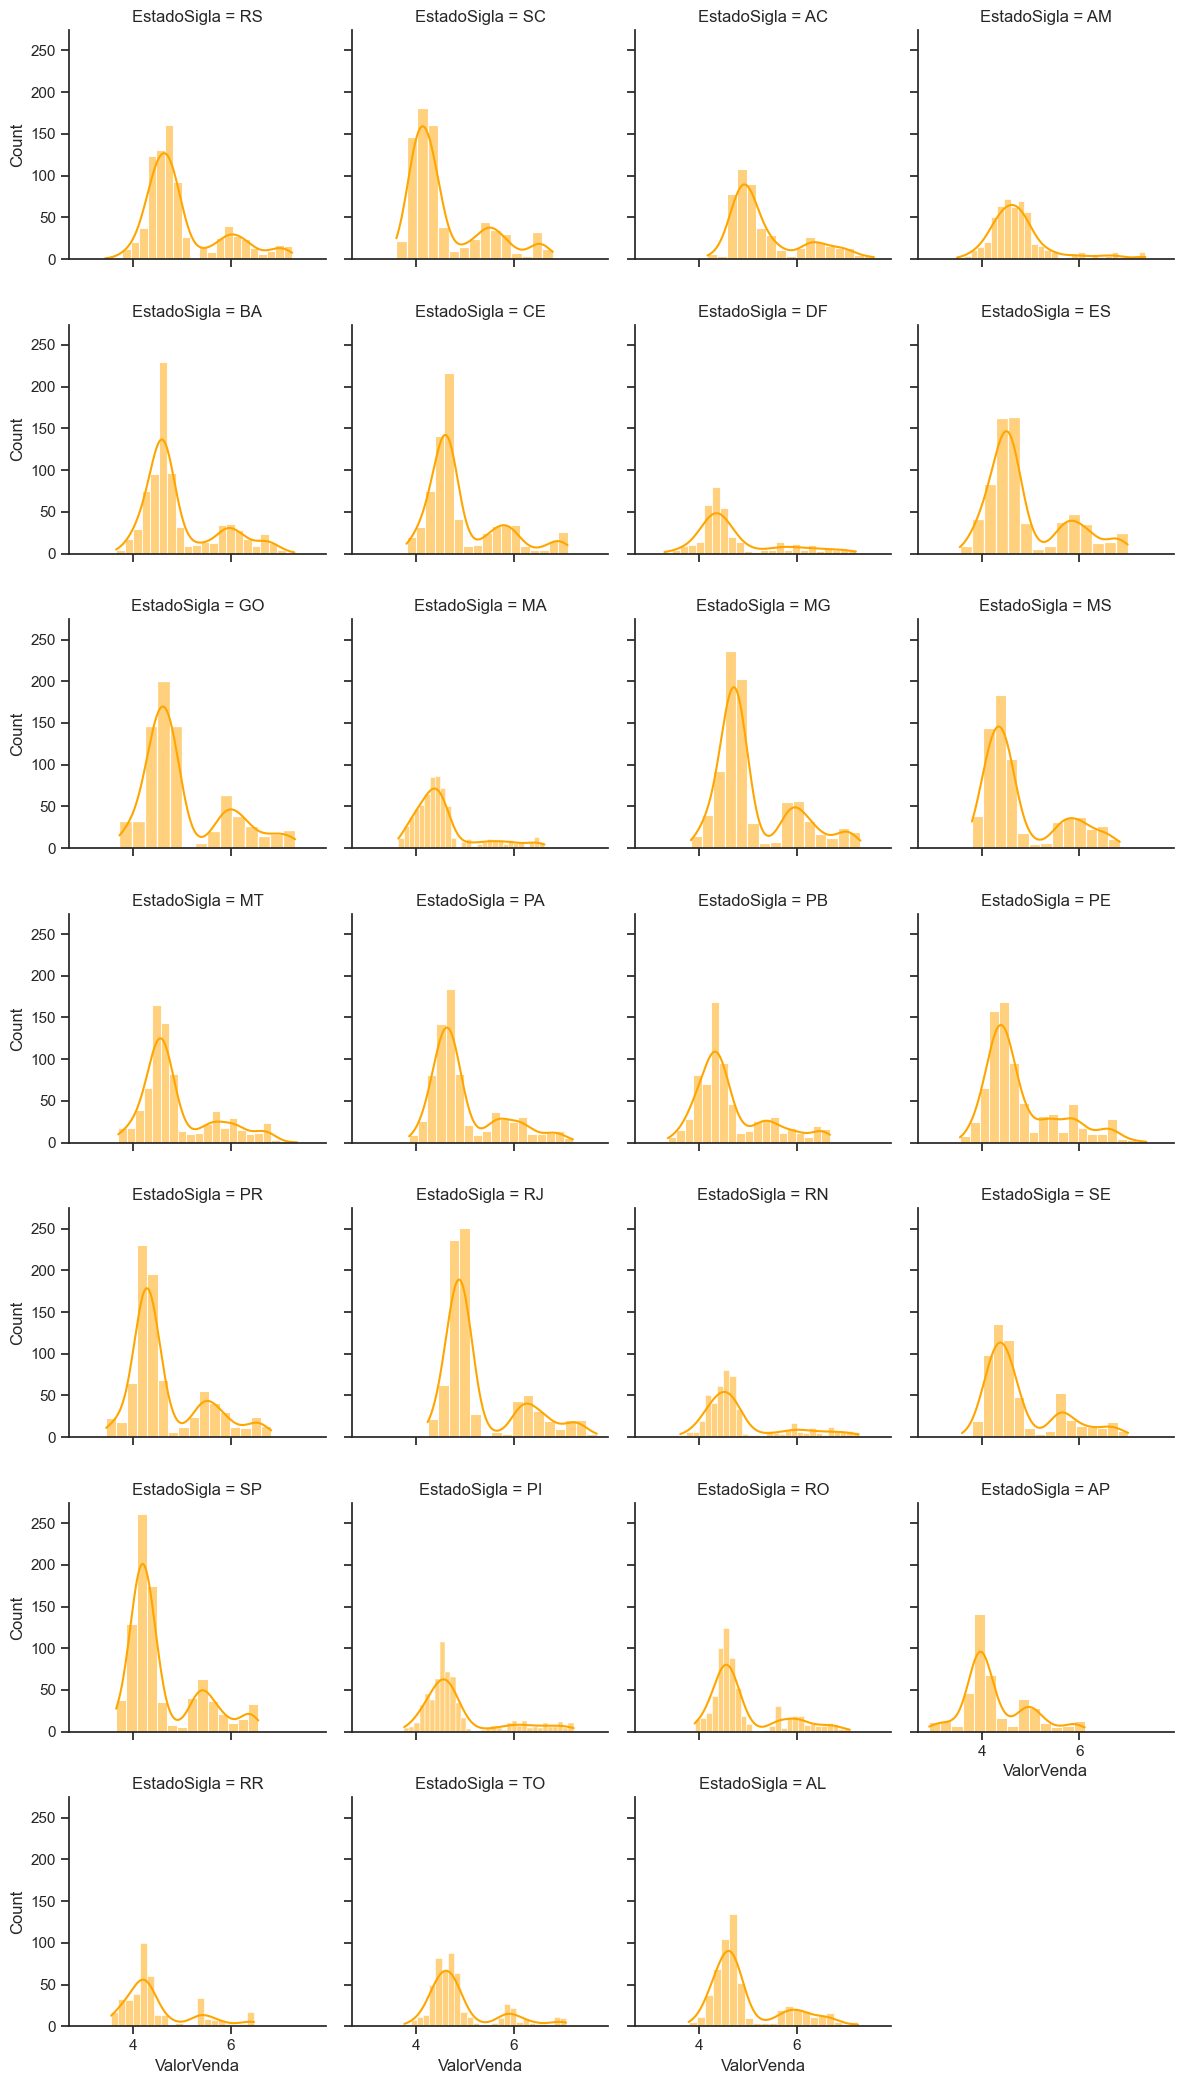

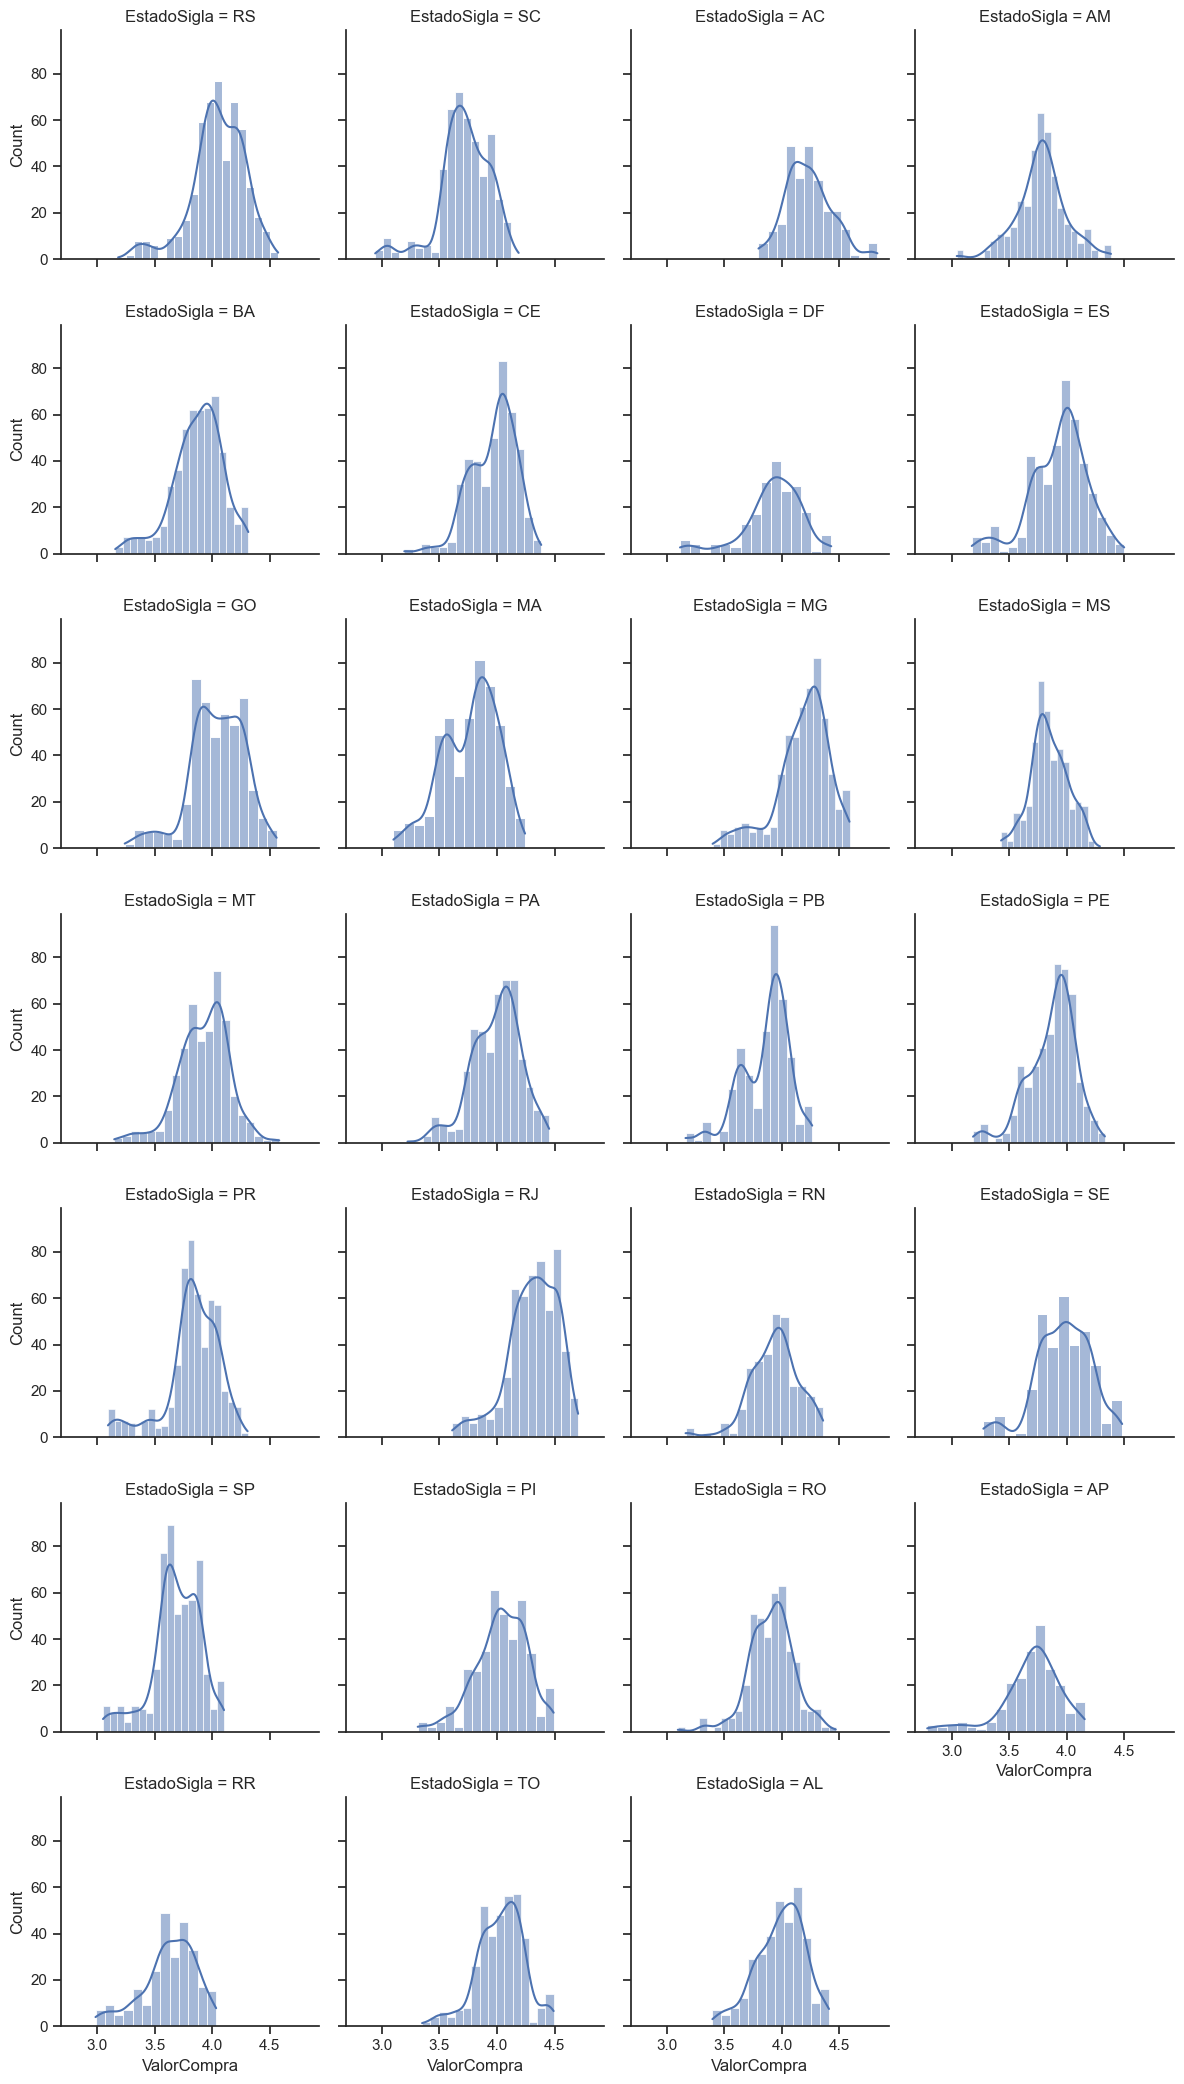

In [20]:
#Distribuição
data = dfb.groupby(['DataColeta','EstadoSigla'])[['ValorVenda','ValorCompra']].mean()
data = data.reset_index()

grid = sb.FacetGrid(data,col='EstadoSigla',col_wrap=4)
grid.map(sb.histplot, 'ValorVenda',kde=True,color='orange')
plt.show()

grid = sb.FacetGrid(data,col='EstadoSigla',col_wrap=4)
grid.map(sb.histplot, 'ValorCompra',kde=True)
plt.show()

Como esperado, os valores de venda e compra entre os estados e bandeira são bastante semelhantes. O que corrobora a observação inicial de que não iríamos encontrar muitas variações nesses valores, apesar de que cada centavo a mais ou a menos possui grande impacto nesse mercado. 

# Testes de Hipótese

Para finalizarmos, é intressante realizar alguns testes de hipóteses que a estatística nos fornece para termos mais confiança nas nossas afirmações até o momento

In [59]:
#Testes de normalidade
x = dfb['ValorCompra'].dropna()
resp_shapiro = scipy.stats.shapiro(x)
print(f'A estatística W para Valor de Compra foi de {resp_shapiro.statistic:.3f}')

x = dfb['ValorVenda'].dropna()
resp_shapiro = scipy.stats.shapiro(x)
print(f'A estatística W para Valor de Venda foi de {resp_shapiro.statistic:.3f}')


A estatística W para Valor de Compra foi de 0.996
A estatística W para Valor de Venda foi de 0.877


Ótimo! O teste de Shapiro Wilk tem o objetivo de testar a normalidade dos dados, quanto mais próximo de 1 a estatística W estiver, maior a probabilidade de termos uma distribuição normal. No nosso caso, só temos mais certeza da inferência inicialmente feita sobre esses valores.

In [93]:
#Analise de Variância
x_1 = dfb['ValorCompra'].loc[dfb['Bandeira']=='BRANCA'].dropna()
x_2 = dfb['ValorCompra'].loc[dfb['Bandeira']=='PETROBRAS DISTRIBUIDORA S.A.'].dropna()
x_3 = dfb['ValorCompra'].loc[dfb['Bandeira']=='IPIRANGA'].dropna()
x_4 = dfb['ValorCompra'].loc[dfb['Bandeira']=='RAIZEN'].dropna()
#x_5 = dfb[['ValorCompra','ValorVenda']].loc[dfb['Bandeira']=='VIBRA ENERGIA'].dropna()

resp_anova = scipy.stats.kruskal(x_1, x_2, x_3, x_4)
print(f'A estatística H para Valor de Compra foi de {resp_anova.statistic:.3f}')


A estatística F para Valor de Compra foi de 12779.692


# Conclusão da análise

O Valor de Venda do produto de 2019 para 2021 sofreu um grande aumento no seu valor, e na sua variação. Reflexo do aumento do valor de compra. Tal aumento foi generalizado para todo o país, não demonstrando casos particulares significativos, as diferenças visiveis possívelmente se devem ao volume de dados coletados em cada região.

Percebemos que apesar do aumento desses valores a margem mantida pelos revendores se mostrou bastante homogênea. Na média dos 11%, com um desvio de 4%. Mesmo em 2020, esse cenário de manteve.

# Preparação dos dados para o modelo

In [ ]:


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
dfb = dfb.reset_index()

In [ ]:
print(f"Valores de Compra antes: \n {dfb['ValorCompra'].describe()}")
plt.figure(figsize=(15,3))
sb.histplot(data=dfb['ValorCompra'],bins=50)
plt.axvline(x=dfb['ValorCompra'].median(),color='r')
plt.axvline(x=dfb['ValorCompra'].mean(),color='g')
plt.show()


#Pegando o intervalo de 9%-12% como margem base para preencher os valores vazios
#Lucro Bruto = ValorVenda - ValorCompra LOGO ValorCompra = ValorVenda - LucroBruto (ValorVenda * Mrg)
dfb['ValorCompra'] = dfb['ValorCompra'].fillna(dfb['ValorVenda']-dfb['ValorVenda']*np.random.choice([0.09,0.10,0.11,0.12]))

print(f"Valores de Compra Depois: \n {dfb['ValorCompra'].describe()}")
plt.figure(figsize=(15,3))
sb.histplot(data=dfb['ValorCompra'],bins=50)
plt.axvline(x=dfb['ValorCompra'].median(),color='r')
plt.axvline(x=dfb['ValorCompra'].mean(),color='g')
plt.show()

print(f"Valores de Venda: \n {dfb['ValorVenda'].describe()}")
plt.figure(figsize=(15,3))
sb.histplot(data=dfb['ValorVenda'],bins=50, color = 'orange')
plt.axvline(x=dfb['ValorVenda'].median(),color='r')
plt.axvline(x=dfb['ValorVenda'].mean(),color='g')
plt.show()



In [ ]:
dfb = dfb.drop('index', axis=1)

In [ ]:
dfb.head(1)

In [ ]:
df_modelo = dfb[['DataColeta','ValorCompra']]

In [ ]:
df_modelo = df_modelo.groupby('DataColeta')['ValorCompra'].mean()

In [ ]:
df_modelo = pd.DataFrame(df_modelo)

In [ ]:
df_modelo['DataColeta']

In [ ]:
ARIMA = seasonal_decompose(x=df_modelo,model='multiplicative')

In [ ]:
df_modelo[1]

In [ ]:
df_modelo.index

In [ ]:
#Recalculando após preenchimento dos valores vazios
#Coluna de Lucro Bruto.
dfb['lucrobruto'] = dfb['ValorVenda'] - dfb['ValorCompra']

#Coluna de Mrg.
dfb['mrg'] = (dfb['ValorVenda']-dfb['ValorCompra'])/dfb['ValorVenda']


data = dfb[['DataColeta','ValorCompra']].groupby('DataColeta').mean()
data = data['ValorCompra']
data.plot(figsize=(15,4),label='Compra')

data = dfb[['DataColeta','ValorVenda']].groupby('DataColeta').mean()
data = data['ValorVenda']
data.plot(figsize=(15,4),label='Venda')

plt.legend()
plt.show()

plt.title('Margem')
data = dfb[['DataColeta','mrg']].groupby('DataColeta').mean()
data = data['mrg']
data.plot(figsize=(15,4),label='mrg', color='orange')
plt.show()

plt.title('Lucro Bruto')
data = dfb[['DataColeta','lucrobruto']].groupby('DataColeta').mean()
data = data['lucrobruto']
data.plot(figsize=(15,4),label='lucrobruto')
plt.show()